#Предварительная установка нужных компонентов

In [ ]:
!pip install scipy==1.11.4
!pip install scikit-plot

# Решил взять задачу RFM, вычислить по каким критериям зависит сумма которую возьмёт клиент в кредит.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc

Я думаю что по следующему списку столбцов можно будет сделать какие-либо выводы: `Avg_Credit_Limit	Total_Credit_Cards	Total_visits_bank	Total_visits_online	Total_calls_made`.

Также собираюсь создать столбец `Total_Credit_Limit`, поскольку если я правильно понял данные то `Avg_Credit_Limit`, это средний лимит на одной карте клиента, значит чтобы лучше понять данные нам необходимо знать сколько клиент в принципе занимает у банка.

In [ ]:
# Google drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Credit Card Customer Data.csv')
# local
df = pd.read_csv('./Credit Card Customer Data.csv', encoding='unicode_escape')
display(df.head(6))

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8


In [ ]:
df['Total_Credit_Limit'] = df['Avg_Credit_Limit'] * df['Total_Credit_Cards']
display(df)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_Credit_Limit
0,1,87073,100000,2,1,1,0,200000
1,2,38414,50000,3,0,10,9,150000
2,3,17341,50000,7,1,3,4,350000
3,4,40496,30000,5,1,1,4,150000
4,5,47437,100000,6,0,12,3,600000
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,990000
656,657,60732,84000,10,1,13,2,840000
657,658,53834,145000,8,1,9,1,1160000
658,659,80655,172000,10,1,15,0,1720000


## Посмотрим зависимости переменных

<Axes: >

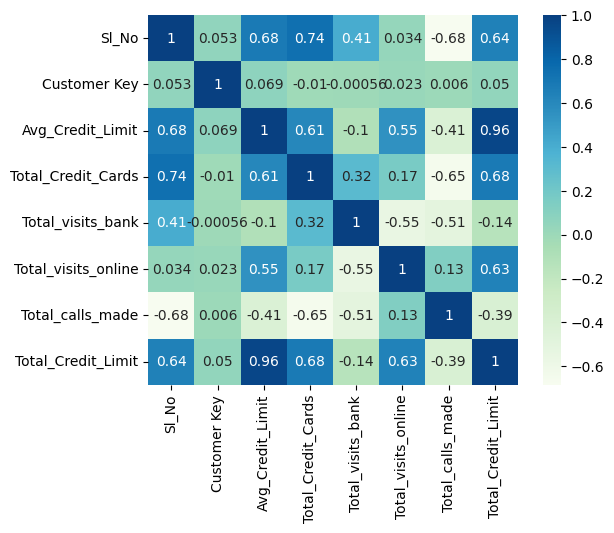

In [ ]:
sns.heatmap(df.corr(), annot=True, square=True, cmap='GnBu')

Теперь, когда видны все корреляции, можно обратить внимение на эти 3, где каждая из них коррелирует с `Total_Credit_Limit`. `Avg_Credit_Limit` и `Total_Credit_Cards` не используем т.к. из них создан столбец `Total_Credit_Limit`.

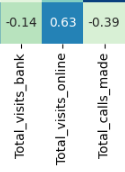

Также решил проверить зависимости между Total_Credit_Cards и Avg_Credit_Limit, т.к. у них есть сильная корреляция, что мы и можнм заметить по данным ниже, чем больще карт, тем больше среднее значение лимита.

In [ ]:
display(df.groupby('Total_Credit_Cards')['Avg_Credit_Limit'].agg(['sum', 'mean', 'max', 'min']))

,sum,mean,max,min
Total_Credit_Cards,,,,
1,676000,11457.627119,20000,5000
2,844000,13187.500000,100000,5000
3,705000,13301.886792,50000,5000
4,3973000,26311.258278,75000,3000
5,2567000,34689.189189,100000,5000
6,3885000,33205.128205,100000,5000
7,4494000,44495.049505,187000,5000
8,1534000,139454.545455,195000,91000
9,1541000,140090.909091,183000,84000


## Нормализуем данные

In [ ]:
corr_column_names = df.columns[2:]
print(corr_column_names)

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'Total_Credit_Limit'],
      dtype='object')


In [ ]:
for i in corr_column_names:
  df[str(i) + '_norm'] = df[i] / df[i].max()

In [ ]:
display(df.head(4))

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_Credit_Limit,Avg_Credit_Limit_norm,Total_Credit_Cards_norm,Total_visits_bank_norm,Total_visits_online_norm,Total_calls_made_norm,Total_Credit_Limit_norm
0,1,87073,100000,2,1,1,0,200000,0.50,0.2,0.2,0.066667,0.0,0.100
1,2,38414,50000,3,0,10,9,150000,0.25,0.3,0.0,0.666667,0.9,0.075
2,3,17341,50000,7,1,3,4,350000,0.25,0.7,0.2,0.200000,0.4,0.175
3,4,40496,30000,5,1,1,4,150000,0.15,0.5,0.2,0.066667,0.4,0.075


Развернём некоторые графики, чтобы все имели положительную регрессию для формарования итогового столбца `score`

In [ ]:
df['Total_visits_bank_norm'] = 1 - df['Total_visits_bank_norm']
df['Total_calls_made_norm'] = 1 - df['Total_calls_made_norm']

<Axes: xlabel='Total_calls_made_norm'>

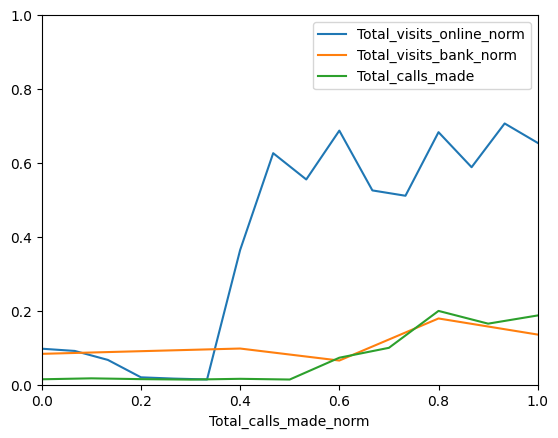

In [ ]:
p = df.groupby('Total_visits_online_norm')['Total_Credit_Limit_norm'].mean()
p.name = 'Total_visits_online_norm'
p.plot(legend=True, xlim=(0, 1), ylim=(0, 1))

p = df.groupby('Total_visits_bank_norm')['Total_Credit_Limit_norm'].mean()
p.name = 'Total_visits_bank_norm'
p.plot(legend=True, xlim=(0, 1), ylim=(0, 1))

p = df.groupby('Total_calls_made_norm')['Total_Credit_Limit_norm'].mean()
p.name = 'Total_calls_made'
p.plot(legend=True, xlim=(0, 1), ylim=(0, 1))

In [ ]:
df['score'] = df[['Total_visits_online_norm', 'Total_visits_bank_norm', 'Total_calls_made_norm']].sum(axis=1)
df['score_norm'] = df['score']/df['score'].max()
df['score_norm']

,score_norm
0,0.622222
1,0.588889
2,0.533333
3,0.488889
4,0.833333
...,...
655,0.822222
656,0.822222
657,0.766667
658,0.933333


In [ ]:
from scikitplot.helpers import cumulative_gain_curve

<Axes: >

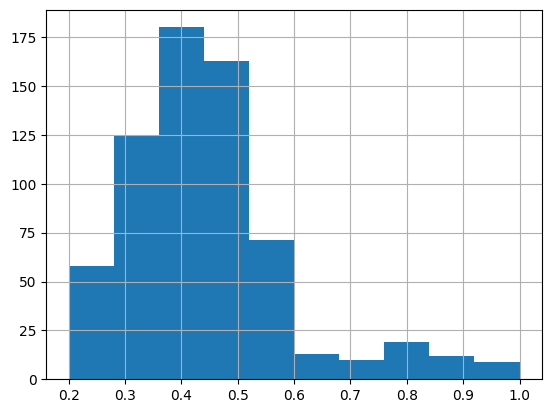

In [ ]:
df['score_norm'].hist()

In [ ]:
df.sort_values('Total_Credit_Limit_norm', ascending=False, inplace=True)

In [ ]:
df['Credit_Limit_cum_%'] = df['Total_Credit_Limit_norm'].cumsum() / df['Total_Credit_Limit_norm'].sum()

In [ ]:
df['count'] = 1
df['count_%'] = df['count'].cumsum() / df['count'].sum()

In [ ]:
display(df)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_Credit_Limit,Avg_Credit_Limit_norm,Total_Credit_Cards_norm,Total_visits_bank_norm,Total_visits_online_norm,Total_calls_made_norm,Total_Credit_Limit_norm,score,score_norm,Credit_Limit_cum_%,count,count_%
630,631,33837,200000,10,0,13,0,2000000,1.000,1.0,1.0,0.866667,1.0,1.0000,2.866667,0.955556,0.014274,1,0.001515
650,651,78996,195000,10,1,12,2,1950000,0.975,1.0,0.8,0.800000,0.8,0.9750,2.400000,0.800000,0.028191,1,0.003030
622,623,53916,176000,10,1,15,2,1760000,0.880,1.0,0.8,1.000000,0.8,0.8800,2.600000,0.866667,0.040752,1,0.004545
658,659,80655,172000,10,1,15,0,1720000,0.860,1.0,0.8,1.000000,1.0,0.8600,2.800000,0.933333,0.053028,1,0.006061
654,655,65750,172000,10,1,9,1,1720000,0.860,1.0,0.8,0.600000,0.9,0.8600,2.300000,0.766667,0.065304,1,0.007576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,47,83326,5000,1,2,2,5,5000,0.025,0.1,0.6,0.133333,0.5,0.0025,1.233333,0.411111,0.999857,1,0.993939
202,203,20593,5000,1,0,3,8,5000,0.025,0.1,1.0,0.200000,0.2,0.0025,1.400000,0.466667,0.999893,1,0.995455
92,93,37016,5000,1,1,4,6,5000,0.025,0.1,0.8,0.266667,0.4,0.0025,1.466667,0.488889,0.999929,1,0.996970
62,63,70248,5000,1,0,2,4,5000,0.025,0.1,1.0,0.133333,0.6,0.0025,1.733333,0.577778,0.999964,1,0.998485


<Axes: xlabel='count_%'>

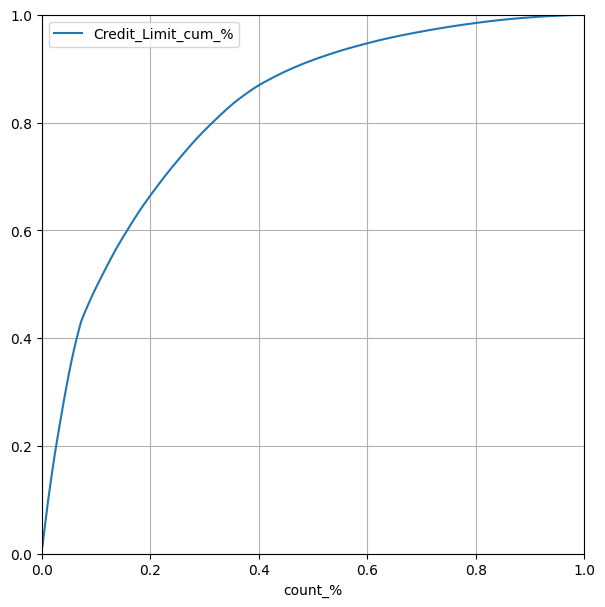

In [ ]:
df.plot(x='count_%', y='Credit_Limit_cum_%', grid=True, figsize=(7,7), xlim=(0, 1), ylim=(0,1))

Дальше после того как мы получили удовлетворительный график, смотрим метрики

In [ ]:
df['count_%_round'] = df['count_%'].round(2)

In [ ]:
t = df.groupby('count_%_round')[['count', 'Total_Credit_Limit']].sum().reset_index()

In [ ]:
t['Total_Credit_Limit_%'] = t['Total_Credit_Limit'].cumsum() / t['Total_Credit_Limit'].sum()

In [ ]:
display(t)

,count_%_round,count,Total_Credit_Limit,Total_Credit_Limit_%
0,0.00,3,5710000,0.040752
1,0.01,6,10017000,0.112244
2,0.02,7,10271000,0.185548
3,0.03,7,8981000,0.249645
4,0.04,6,7237000,0.301295
...,...,...,...,...
96,0.96,6,59000,0.998794
97,0.97,7,61000,0.999229
98,0.98,7,53000,0.999607
99,0.99,6,35000,0.999857


Метрики которые можно показывать, `uplift` - это показатель который говорит во соклько раз модель лучше случайного выбора клиента

In [ ]:
t['uplift'] = t['Total_Credit_Limit_%']/t['count_%_round']

In [ ]:
t[t['count_%_round'].isin([0.05, 0.1, .2, .3, .5])]

,count_%_round,count,Total_Credit_Limit,Total_Credit_Limit_%,uplift
5,0.05,7,7665000,0.356000,7.120009
10,0.10,7,3091000,0.502858,5.028584
20,0.20,7,2062000,0.670613,3.353067
30,0.30,7,1530000,0.789937,2.633123
50,0.50,7,555000,0.917668,1.835335


Показать распределение значений

In [ ]:
df['score_round'] = df['score_norm'].round(2)

In [ ]:
df.groupby('score_round')['Total_Credit_Limit'].agg(['count', 'mean'])

,count,mean
score_round,,
0.20,13,1.741538e+05
0.22,6,1.603333e+05
0.23,5,1.544000e+05
0.24,5,1.082000e+05
0.26,3,6.733333e+04
...,...,...
0.91,1,1.246000e+06
0.93,2,1.238000e+06
0.96,3,1.398000e+06


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)